## Sleep drive analysis with ML

In [86]:
import os.path
import glob
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import ipyplot
import yaml

In [113]:
round(3.6)

4

In [103]:
# please select here the background 
BACKGROUND = "glia"
# BACKGROUND = "KC"
# last one uncommented is selected

In [104]:
CONFUSION_TABLE_ENABLED=True
METRICS_ENABLED=True
CROSSANALYSIS_ENABLED=False

In [105]:
# dont change any code from here on

In [106]:
RESULTS_ROOT = "../results/"
RESULTS_DIR = os.path.join(RESULTS_ROOT, f"{BACKGROUND}-models", "NN")
SEED=1000
fraction=1.0
RESULTS_DIR

'../results/glia-models/NN'

In [107]:
celltypes = glob.glob(os.path.join(RESULTS_DIR, "*"))

In [108]:
def get_celltype_and_folder(folder):
    celltype = os.path.basename(celltype_folder)
    results_dir = os.path.join(celltype_folder, f"random-state_{SEED}_fraction_{fraction}")
    return celltype, results_dir

In [109]:
confusion_tables = []
accuracy_d = {}
accuracy_table = {}
for celltype_folder in celltypes:
    celltype, results_dir = get_celltype_and_folder(celltype_folder)
    
    # read the confusion table between sleep drive conditions for the same celltype
    if CONFUSION_TABLE_ENABLED:
        confusion_table_file = os.path.join(results_dir, f"{celltype}_confusion_table.png")
        confusion_table = cv2.imread(confusion_table_file)
        print(celltype)
        confusion_tables.append(confusion_table)
    
    
    # read the metrics of each celltype.
    if METRICS_ENABLED:
        metrics_file = os.path.join(results_dir, f"{celltype}_metrics.yaml")
        with open(metrics_file, "r") as filehandle:
                metrics = yaml.load(filehandle, yaml.SafeLoader)

        accuracy = metrics["test-accuracy"]
        accuracy_d[celltype] = accuracy
    
    # read the metrics of the models trained on each celltype and run on all celltypes
    if CROSSANALYSIS_ENABLED:
        for celltype_folder in celltypes:
            datatype, data_results_dir = get_celltype_and_folder(celltype_folder)

            data_metrics_file = os.path.join(results_dir, f"{datatype}_metrics.yaml")
            with open(data_metrics_file, "r") as filehandle:
                metrics = yaml.load(filehandle, yaml.SafeLoader)
                accuracy = metrics["test-accuracy"]
                if celltype in accuracy_table:          
                    accuracy_table[celltype][datatype] = accuracy
                else:
                    accuracy_table[celltype] = {datatype: accuracy}

EGN++
ALG+
SPG
PNG
EGN+-
CXG



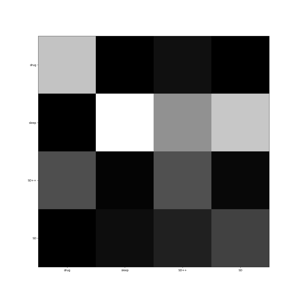
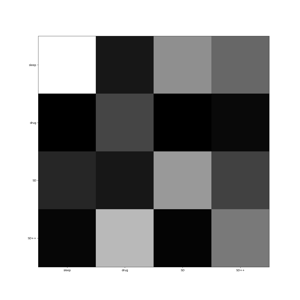
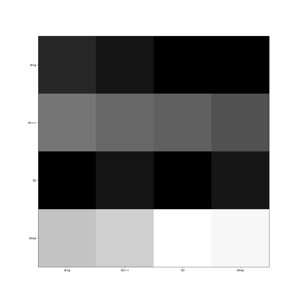
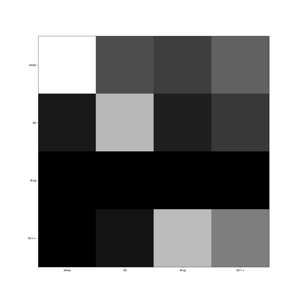
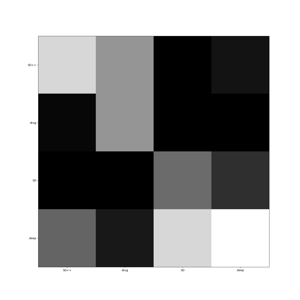
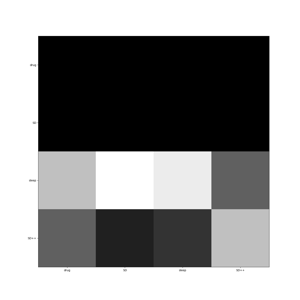


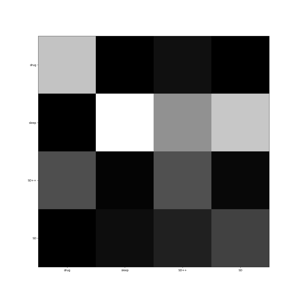
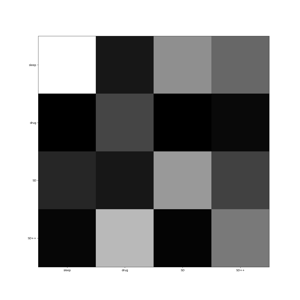
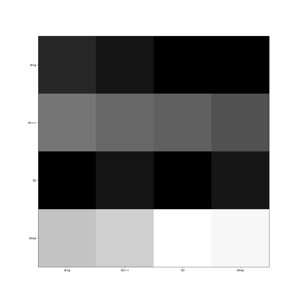
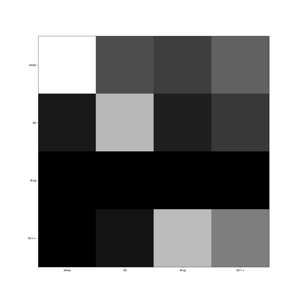
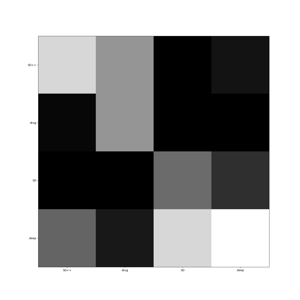
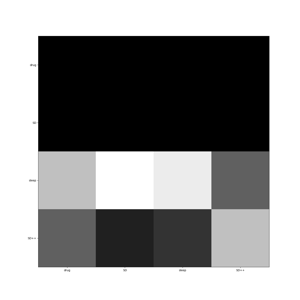

In [110]:
if CONFUSION_TABLE_ENABLED: ipyplot.plot_images(confusion_tables, max_images=10, img_width=300)

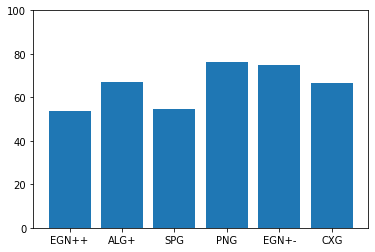

In [111]:
if METRICS_ENABLED:
    plt.bar(accuracy_d.keys(), accuracy_d.values())
    plt.ylim([0, 100])

In [76]:
if CROSSANALYSIS_ENABLED:
    pass